## Classification and Logistic Regression 

Let's look at the binary classification problem then we generalize the concepts to multi-class classification problem.

Why not use linear regression for solving classification problems?
- Doesn't make sense for $h_{\theta}(x)$ to take values less than 0 and greater than 1 if we know that $y\in\{0, 1\}$

To fix this we can change our hypothesis function - 
$$
h_{\theta}(x) = g(\theta^Tx) = \frac{1}{1 + e^{-\theta^Tx}}
$$

where - 
$$
g(z) = \frac{1}{1+e^{-z}}
$$

is called the sigmoid function and always lies in the range $[0, 1]$.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

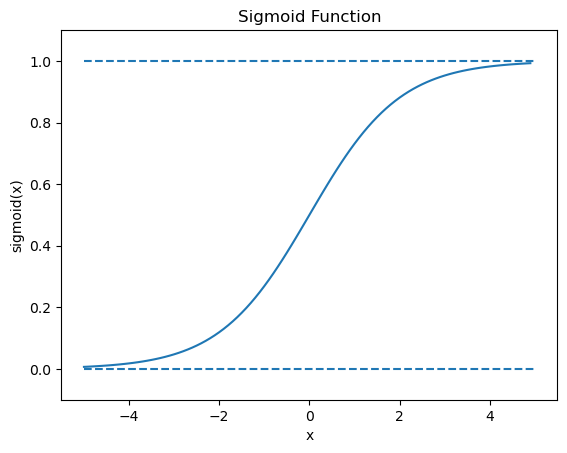

In [2]:
# plot sigmoid function 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# define input
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

# plot with h-lines on 0 and 1
plt.plot(x, y)
plt.hlines([0, 1], -5, 5, linestyles='dashed')
plt.ylim(-0.1, 1.1)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.show()


In [3]:
# load iris data
df = pd.read_csv('../data/iris.csv')
df.head()

# encode class
df['class'] = df['class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
df.head()

df_binary = df[df['class'] != 2]

### Derivative of sigmoid function

$$\begin{align*}
g'(z) &= \frac{d}{dz}\frac{1}{1 + e^{-z}} \\
&= \frac{e^{-z}}{(1 + e^{-z})^2} \\
&= \frac{1 + e^{-z} - 1}{(1 + e^{-z})^2} \\
&= g(z) = g(z)^2 \\
&= g(z)(1 - g(z))
\end{align*}
$$

Now we need to develop an algorithm that finds the optimal value of $\theta$ for a given binary classification problem.<br>
This can be derived by finding the maximum likelihood estimator (MLE) of $\theta$ under a certain set of assumption. 

Assumptions for logistic regression - 
$$\begin{align*}
&P(y = 1|x;\theta) = h_{\theta}(x) \\
&P(y = 0|x;\theta) = 1 - h_{\theta}(x) \\
\therefore \ &p(y|x;\theta) = (h_{\theta}(x))^y(1 - h_{\theta}(x))^{1-y}
\end{align*}
$$

When written as a function of $\theta$, we call it as likelihood, over $n$ training examples - 
$$
L(\theta) = \Pi_{i = 1}^{n}(h_{\theta}(x^{(i)}))^{y^{(i)}}(1 - h_{\theta}(x^{(i)}))^{1-y^{(i)}}
$$

To find the optimal value of $\theta$ that maximizes the $L(\theta)$ we need to take the derivative of $L(\theta)$ w.r.t $\theta$. Note that the optimizing $L(\theta)$ is equivalent to optimizing log-likelihood $l(\theta)$. 

$$\begin{align*}
l(\theta) &= \Sigma_{i = 1}^{n}y^{(i)}ln(h(x^{(i)})) + (1 - y^{(i)})ln(1 - h(x^{(i)})) \\
\implies l(\theta) &= \Sigma_{i = 1}^{n}y^{(i)}ln(g(\theta^Tx^{(i)})) + (1 - y^{(i)})ln(1 - g(\theta^Tx^{(i)}))
\end{align*}
$$

The **negative log-likelihood** is our cost function which we need to minimize. $\theta^Tx$ is called the **logit**.

Taking the derivative w.r.t $j^{th}$ component of $d+1$ dimensional vector $\theta$ - 
$$\begin{align*}
\frac{d}{d\theta_j}l(\theta) &= \Sigma_{i = 1}^{n}\{\frac{y^{(i)}g(\theta^Tx^{(i)})(1- g(\theta^Tx^{(i)}))x^{(i)}_j}{g(\theta^Tx^{(i)})} - \frac{(1 - y^{(i)})g(\theta^Tx^{(i)})(1- g(\theta^Tx^{(i)}))x^{(i)}_j}{(1- g(\theta^Tx^{(i)}))}\} \\
\implies \frac{d}{d\theta_j}l(\theta) &= \Sigma_{i = 1}^{n}(y^{(i)} - h_{\theta}(x^{(i)}))x^{i}_j
\end{align*}
$$

$\therefore$ The Batch Gradient Algorithm is given as follows - 
$$\begin{align*}
\theta &:= \theta + \alpha l'(\theta) \\
\theta &:= \theta + \alpha \Sigma_{i = 1}^{n}(y^{(i)} - h_{\theta}(x^{(i)}))x^{i} 
\end{align*}
$$

And Stochastic gradient descent algorithm is given by  - 

$$\begin{align*}
\theta &:= \theta + \alpha (y^{(i)} - h_{\theta}(x^{(i)}))x^{i} 
\end{align*}
$$

In [4]:
# batch gradient descent with only 1 feature (sepal length)   
from tqdm import tqdm
epoch = 1000
alpha = 0.01
n = len(df_binary)

# initial guess of theta
theta = np.array([[4.8], [3.]])

# feature matrix
X = df_binary['sepal_length'].values.reshape(-1,1)
X = np.hstack((np.ones((n,1)), X))
# normalize
X = (X - X.mean()) / X.std()
y = df_binary['class'].values.reshape(-1,1)

print(f"X shape: {X.shape} \ny shape: {y.shape} \ntheta shape: {theta.shape}")

# cost function
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    J = np.sum(-y * np.log(h) - (1-y) * np.log(1-h))
    return J

J = []
# gradient descent
for i in tqdm(range(epoch)):
    h = sigmoid(X @ theta)
    J.append(cost_function(X, y, theta))
    theta = theta - (alpha) * (X.T @ (h-y))

X shape: (100, 2) 
y shape: (100, 1) 
theta shape: (2, 1)


100%|██████████| 1000/1000 [00:00<00:00, 18288.66it/s]


In [5]:
theta

array([[9.73570923],
       [9.98625369]])

Text(0.5, 1.0, 'Cost Function (Batch Gradient Descent)')

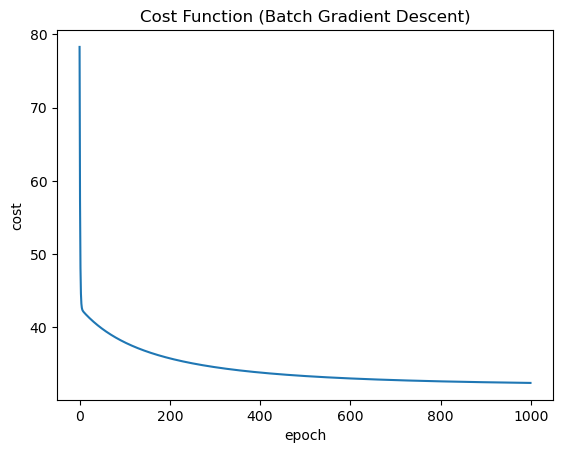

In [6]:
# plot cost function
plt.plot(J) 
plt.xlabel('epoch')
plt.ylabel('cost')
plt.title('Cost Function (Batch Gradient Descent)')

In [7]:
y.shape

(100, 1)

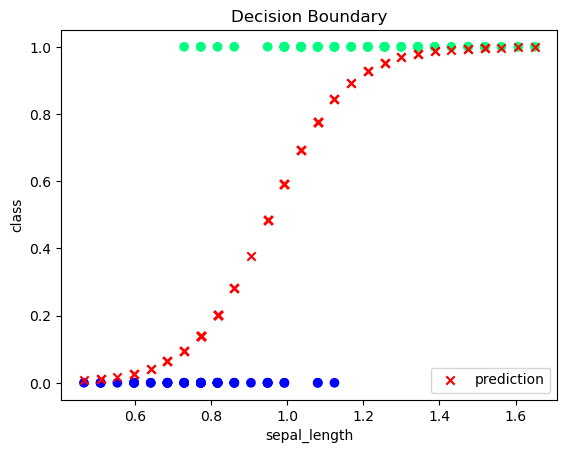

In [8]:
# plot decision boundary
plt.scatter(X[:,1], y, c=y, cmap='winter')
h = sigmoid(X @ theta)
plt.scatter(X[:,1], h, marker='x', c='r', label='prediction')
plt.xlabel('sepal_length')
plt.ylabel('class')
plt.title('Decision Boundary')
plt.legend()
plt.show()

In [9]:
# stochastic gradient descent with only 1 feature (sepal length)
epoch = 1000
alpha = 0.01
n = len(df_binary)

# initial guess of theta
theta = np.array([[4.8], [3.]])
# feature matrix

X = df_binary['sepal_length'].values.reshape(-1,1)
X = np.hstack((np.ones((n,1)), X))
# normalize
X = (X - X.mean()) / X.std()
y = df_binary['class'].values.reshape(-1,1)

print(f"X shape: {X.shape} \ny shape: {y.shape} \ntheta shape: {theta.shape}")

# cost function
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    J = np.sum(-y * np.log(h) - (1-y) * np.log(1-h))
    return J

J = []
# stochastic gradient descent
for epoch in tqdm(range(epoch)):
    for i in range(n):
        X_i = X[i].reshape(1,-1)
        h = sigmoid(X_i @ theta)
        # print(f"Shape of h: {h.shape}")
        J.append(cost_function(X, y, theta))
        theta = theta - (alpha) * (X_i.T @ (h-y[i]))
        # theta = theta - (alpha) * (X[i]*(h-y[i]))
        # print(f"Shape of theta: {theta.shape}")
        # print(f"Shape of j: {J[-1].shape}")
        # print(J[-1])

X shape: (100, 2) 
y shape: (100, 1) 
theta shape: (2, 1)


100%|██████████| 1000/1000 [00:05<00:00, 189.13it/s]


In [10]:
theta

array([[ 9.66004542],
       [10.0150924 ]])

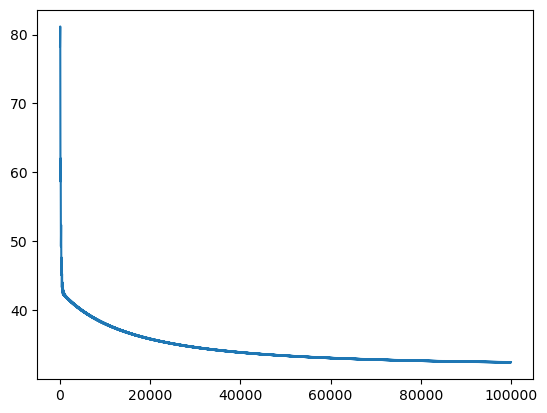

In [11]:
# plot cost function
plt.plot(J)

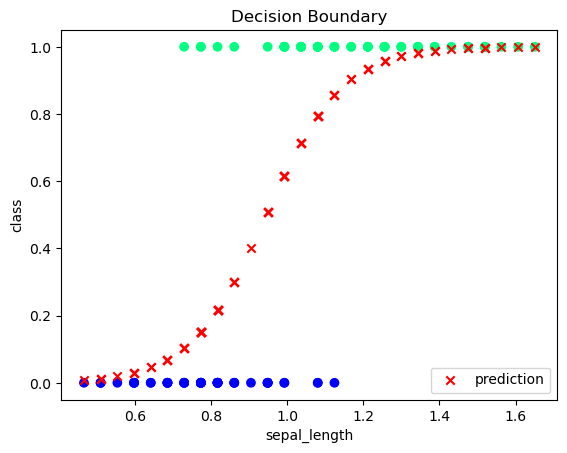

In [12]:
# plot decision boundary
plt.scatter(X[:,1], y, c=y, cmap='winter')
h = sigmoid(X @ theta)
plt.scatter(X[:,1], h, marker='x', c='r', label='prediction')
plt.xlabel('sepal_length')
plt.ylabel('class')
plt.title('Decision Boundary')
plt.legend()
plt.show()

### Perceptron Learning Algorithm

We modify the logistic regression to force to forse it to output 0 or 1. We define the $g(z)$ as follows:

$$
g(z) = \begin{cases}
1 & \text{if } z \geq 0 \\
0 & \text{otherwise}
\end{cases}
$$

We let $h_{\theta}(x) = g(\theta^Tx)$, the gradient descent algorithm is given by - 

$$
\theta_j := \theta_j + \alpha(y^{(i)} - h_{\theta}(x^{(i)}))x^{(i)}_j
$$

## Multi-class Classification 
When the target variable $y \in \{1, ..., k\}$, we have k-class classification problem. For binary classification, $k = 2$.
We model the target variable as distributed according to a multinomial distribution.
$$\begin{align*}
P(y=i|x;\theta) &= \phi_{i} \\
\Sigma_{i = 1}^{k}\phi_{i} &= 1
\end{align*}
$$

We introduce k-sets of parameters $\theta_1, ..., \theta_k$, $\theta_i \in d$ to parameterize the $\phi$. 

How do we calculate the individual class probabilities $\phi_i$? <br>
We can use $\theta^Tx$ to represent the probabilities but it's values are not guaranteed to be in range $[0,1]$ and follow the constraint $\Sigma_{i = 1}^{k}\phi_{i} = 1$. <br>
We can normalize the values of $\theta^Tx$ using the softmax function.

Let $t_i = \theta_i^Tx$, then 

$$\begin{align*}
\left[\begin{array}{c}
P(y = 1 | x;\theta)\\
P(y = 2 | x;\theta)\\
.\\
.\\
.\\
P(y = k | x;\theta)\\
\end{array}
\right]_{n\times d} &= softmax(t_1, ..., t_k) = 
\left[\begin{array}{c}
\frac{exp^{t_1}}{\Sigma_{j=1}^{k}exp^{t_j}} \\
\frac{exp^{t_2}}{\Sigma_{j=1}^{k}exp^{t_j}} \\
. \\
. \\
\frac{exp^{t_k}}{\Sigma_{j=1}^{k}exp^{t_j}} \\
\end{array}
\right] \\
\therefore P(y=i|x;\theta) &= \phi_i = \frac{exp^{t_i}}{\Sigma_{j=1}^{k}exp^{t_j}}
\end{align*}
$$

Now, the likelihood is defined as - 
$$\begin{align*}
L(\theta) &= \Pi_{i=1}^nP(y^{(i)}|x^{(i)};\theta) \\
&= \Pi_{i=1}^n \frac{exp(t_{(y^{(i)})})}{\Sigma_{j=1}^{k}exp(t_j)}
\end{align*}
$$
$\therefore$ the negative log likelihood id given by - 
$$
l(\theta) = -\Sigma_{i=1}^nln(\frac{exp(\theta_{y^{(i)}}^Tx^{(i)})}{\Sigma_{j=1}^{k}exp(\theta_j^Tx^{(j)})}) 
$$

We can define the cross entropy loss function as $l_{ce} : \bf{R}^k \times \{1, ..., k\} \rightarrow \bf{R}_{\geq 0}$
$$
l_{ce}((t_{(1)}, t_{2)}, ..., t_{(k)}), y) = -ln(\frac{exp(t_y)}{\Sigma_{j=1}^{k}exp(t_j)})
$$

$\therefore$ $l(\theta)$ can be re-written as - 
$$
l(\theta) = \Sigma_{i=1}^n l_{ce}((\theta_1^Tx^{(i)}, \theta_2^Tx^{(i)}, ..., \theta_k^Tx^{(i)}),y^{(i)})
$$

To find the optimal values of $\theta_i \in \bf{R}^d,  i \in \{1,2,...,k\}$. we need to minimize the $\frac{\partial l(\theta)}{\partial \theta_i}$
$$\begin{align*}
\frac{\partial l_{ce}(t,y)}{\partial t_i} &= \phi_i - 1\{y = i\} \\
\implies \frac{\partial l_{ce}(t,y)}{\partial t}  &= \phi_i -e_y \\
\implies \frac{\partial l_{ce}(t,y)}{\partial \theta_i} &= \frac{\partial l_{ce}(t,y)}{\partial t_i}\frac{\partial t_i}{\partial \theta_i} \\
&= (\phi_i - 1\{y = i\})x
\end{align*}
$$

Where - 
- $t = \{t_1, ..., t_k\}$
- $e_y =$ one-hot encoded vector 

$$\begin{align*}
\therefore \frac{\partial l(\theta)}{\partial \theta_i} &= \frac{\partial}{\partial \theta_i} \Sigma_{j=1}^n l_{ce}((\theta_1^Tx^{(j)}, \theta_2^Tx^{(j)}, ..., \theta_k^Tx^{(j)}),y^{(j)}) \\
&= \Sigma_{j=1}^n (\phi_i^{(j)} - 1\{y^{(j)} = i\})x^{(j)}
\end{align*}
$$

Where - 
- $\phi_i^{(j)} = P(y^{(j)} = i|x^{(j)};\theta)$

We can minimize the loss function $l(\theta)$, to find the optimal value of $\theta$

In [13]:
# 3-class classification
# stochastic gradient descent with single feature (sepal length)
from tqdm import tqdm
epoch = 1000
alpha = 0.01
n = len(df)

# initial guess of theta, theta_i is the vector of two elements for the i-th class, theta is the matrix of all theta_i
theta = np.array([[4.8, 3.], [4.2, 3.], [4.8, 3.]])
# feature matrix
X = df['sepal_length'].values.reshape(-1,1)
X = np.hstack((np.ones((n,1)), X))
# normalize
X = (X - X.mean()) / X.std()
y = df['class'].values.reshape(-1,1)

print(f"X shape: {X.shape} \ny shape: {y.shape} \ntheta shape: {theta.shape}")
# class distribution
print(f"Class distribution: \n{np.unique(y, return_counts=True)}")
print(theta)

# training loop
J = []
for epoch in tqdm(range(epoch)):
    # calculate cost function
    cost = 0
    for i in range(n):
        X_i = X[i].reshape(1,-1)
        theta_y_i = theta[y[i]]
        # print(f"X_i shape: {X_i.shape} \ntheta_y_i shape: {theta_y_i.shape}")
        num = np.exp(np.sum(np.dot(theta_y_i, X_i.T)))
        denom = np.sum(np.exp(theta @ X_i.T))
        cost -= np.log(num / denom)
        # update theta
        e_y = np.zeros((3,1))
        e_y[y[i]] = 1
        phi_i = np.exp(theta @ X_i.T) / np.sum(np.exp(theta @ X_i.T))
        theta = theta - (alpha) * (phi_i - e_y) @ X_i
    # calculate cost function
    J.append(cost)

    

X shape: (150, 2) 
y shape: (150, 1) 
theta shape: (3, 2)
Class distribution: 
(array([0, 1, 2], dtype=int64), array([50, 50, 50], dtype=int64))
[[4.8 3. ]
 [4.2 3. ]
 [4.8 3. ]]


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:08<00:00, 113.05it/s]


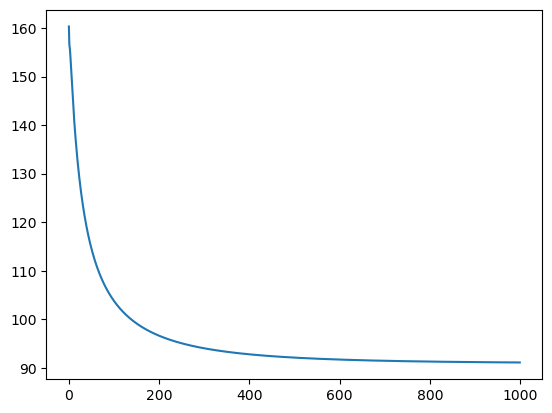

In [14]:
# plot cost function
plt.plot(J)

In [16]:
theta

array([[-2.99854807, -5.68263015],
       [ 5.59200108,  4.76810797],
       [11.20654699,  9.91452218]])

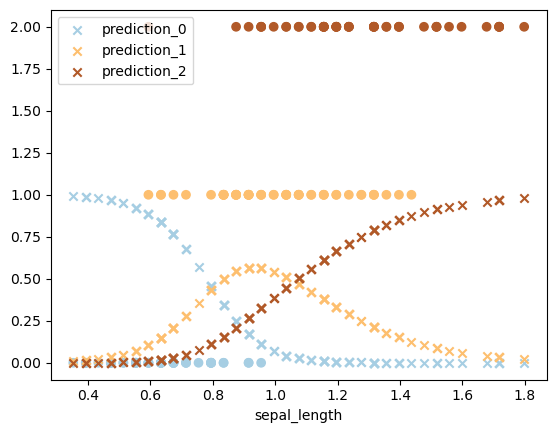

In [42]:
import matplotlib
cmap = matplotlib.colormaps['Paired']
# plot the decision boundary
plt.scatter(X[:,1], y, c=y, cmap='Paired')
# calculate the probability of each class
# P(y = i | x) = exp(theta_i @ x) / sum(exp(theta_j @ x))
# where i = 0, 1, 2
theta_0 = theta[0]
theta_1 = theta[1]
theta_2 = theta[2]  
phi_1 = np.exp(theta_0 @ X.T) / np.sum(np.exp(theta @ X.T), axis=0)
phi_2 = np.exp(theta_1 @ X.T) / np.sum(np.exp(theta @ X.T), axis=0)
phi_3 = np.exp(theta_2 @ X.T) / np.sum(np.exp(theta @ X.T), axis=0)
# plot the prediction
plt.scatter(X[:,1], phi_1, marker='x', color=cmap.colors[0], label='prediction_0')
plt.scatter(X[:,1], phi_2, marker='x', color=cmap.colors[6], label='prediction_1')
plt.scatter(X[:,1], phi_3, marker='x', color=cmap.colors[11], label='prediction_2')
plt.xlabel('sepal_length')
plt.legend()
plt.show()

### Newton's method for logistic regression.

Given a function $f(\theta)$, we can find the zeros of the function using the Newton's method. We can iteratively update the value of $\theta$ using the following relation - 
$$
\theta := \theta - \frac{f(\theta)}{f'(\theta)}
$$

Using Newton's method we can also find the minimum values of our cost function of the logistic regression function, by finding the zeros of $l'(\theta)$. The update rule is then given by - 
$$
\theta := \theta - \frac{l'(\theta)}{l''(\theta)}
$$ 

$\because \theta \in \bf{R}^d$, 
$$
\theta := \theta - H^{-1}\nabla_{\theta}l(\theta)
$$

Where - 
- $\nabla_{\theta}l(\theta)$ = $d$ dimensional vector with $i^{th}$ element is $\frac{\partial l(\theta)}{\partial \theta_i}$
- $H$ - $d\times d$ hessian of $l(\theta)$, $H_{ij} = \frac{\delta^2l(\theta)}{\delta\theta_i\theta_j}$

Usually Newton's method converges faster than the gradient descent w.r.t the number of iteration required. But it requires a intensive compute of inverting the hessian matrix. 